# Linear Regression

I will implement single variable linear regression from scrath to solve the following example (Example 17.1). 

| x      | y | 
| :----:       |    :----:   |
| 1      | 0.5       |
| 2   | 2.5        |
| 3   | 2.0        |
| 4   | 4.0        |
| 5   | 3.5        |
| 6   | 6.0        |
| 7   | 5.5        |

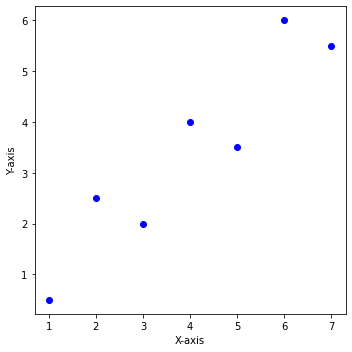

In [8]:
# Plot the data in 2-D figure

# import libraries
import matplotlib.pyplot as plt
 
# define data
x =[1,2,3,4,5,6,7]
y =[0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5]

# plot every data points (x,y) on 2d graph
plt.scatter(x, y, c ="blue")
# add the labels of x axis and y axis
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# To show the plot
plt.show()

In [17]:
# linear regression function. The implementation here directly follow the pseudo code provided in class.
def Regression(x, y):
    sumx = 0
    sumxy = 0
    sumy = 0
    sumx2 = 0
    st = 0
    sr = 0
    
    n = len(x)
    
    for i in range(n):
        sumx = sumx + x[i]
        sumy = sumy + y[i]
        sumxy = sumxy + x[i]*y[i]
        sumx2 = sumx2 + x[i]*x[i]
    
    xm = sumx/n # calcualte the mean of x
    ym = sumy/n # calcualte the mean of x
    
    # calcuate coefficient a0 and a1
    a1 = (n*sumxy - sumx*sumy)/(n*sumx2 - sumx*sumx)
    a0 = ym - a1*xm
    
    # calculate total sum of the squares around the mean st and sum of the squares of the residuals sr
    for i in range(n):
        st = st + (y[i] - ym)**2
        sr = sr + (y[i] - a1*x[i] - a0)**2
        
    r2 = (st - sr)/st
    
    return a0, a1, r2

# define data
x =[1,2,3,4,5,6,7]
y =[0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5]
   
# call Regression function to solve for a0, a1, and R-squared
a0, a1, r2 = Regression(x, y)

# print the results
print("The solutions of linear regression ", "y=", a0, " + ", a1, "x")
print("The R-squared: ", r2)

The solutions of linear regression  y= 0.07142857142857117  +  0.8392857142857143 x
The R-squared:  0.8683176100628932


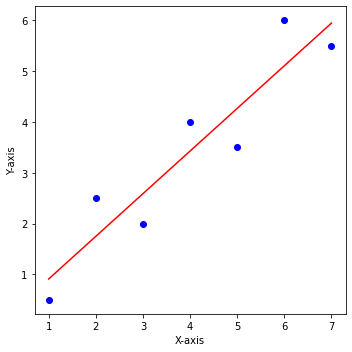

In [16]:
# Plot the data and the linear regression in 2-D figure

# import libraries
import matplotlib.pyplot as plt
 
# define data
x =[1,2,3,4,5,6,7]
y =[0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5]

# plot the original data
plt.scatter(x, y, c ="blue")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# plot the regression line

# define target function to plot
def target_function(x):
    return a0 + a1*x

x_hat = np.linspace(1, 7, 100) # x is a list with 100 elements from 1 to 7.
y_hat = [] # store the estimate of y based on linear regression function

# calculate y for each number in x. Note that x is a list.

for i in range(len(x_hat)): # for each number in x
    y_hat.append(target_function(x_hat[i]))

# plot the fitted line in red
plt.plot(x_hat, y_hat, color='red')

# To show the plot
plt.show()

The solutions of linear regression  y= 0.07142857142857162  +  0.8392857142857142 x
The R-squared:  0.8683176100628929


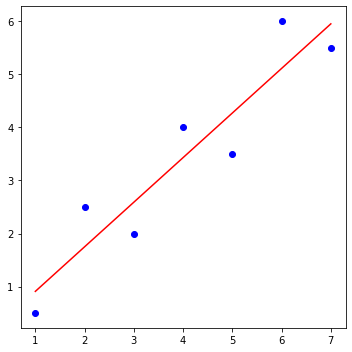

In [24]:
# Python has some neat linear regression functions: stats.linregress(x, y)

import matplotlib.pyplot as plt
from scipy import stats

# define data
x =[1,2,3,4,5,6,7]
y =[0.5, 2.5, 2.0, 4.0, 3.5, 6.0, 5.5]

# this is the "magic" line
slope, intercept, r, p, std_err = stats.linregress(x, y)

# print the results
print("The solutions of linear regression ", "y=", intercept, " + ", slope, "x")
print("The R-squared: ", r**2)

# define the function you want to plot
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

# plot data  in blue and line in red
plt.scatter(x, y, color ="blue")
plt.plot(x, mymodel, color = "red")
plt.show()

# Newton's Interpolating Polynomial

I will use Newton's Interpolating Poolynomial to interpolate the following three data points.

| x      | f(x) | 
| :----:       |    :----:   |
| 1      | 0       |
| 4   | 1.386294        |
| 6   | 1.791759        |

In [54]:
# Newton's interpolating polinomial function. The implementation here should match the pseudo code provided in class.
def NewtInt(x, y, n, xi): # x, y are data points, n is the points you would like to use to approximate. So n = 3 means 2nd approximation
    import numpy as np
    fdd = np.zeros([n,n]) # Divided-difference
    yint = np.zeros(n) # y interpolating
    ea = np.zeros(n) # 
    if (n>len(x)):
        print("The number of data points are not sufficient to estimate ", n, ' order polynomial function!')
    else:
        for i in range(n):
            fdd[i, 0] = y[i] # i is the index of data points. 0 means 0 order divided-differential
            
        for j in range(1,n):
            for i in range(n-j):
                fdd[i,j] = (fdd[i+1, j-1] - fdd[i,j-1])/(x[i+j] - x[i]) # from x_i to x_j
        
        # add each order of Newton's interpolating polinomial function
        
        xterm = 1
        yint[0] = fdd[0,0] # The first order interpolating: f(x_0) 
        
        for order in range(1,n):
            xterm = xterm*(xi - x[order - 1]) # (x-x0)(x-x1)....
            yint2 = yint[order-1] + fdd[0,order] * xterm
            ea[order-1] = yint2 - yint[order - 1]
            yint[order] = yint2
    
    return yint, ea

# define data
x =[1,4,6]
y =[0, 1.386294, 1.791759]
n = 3 # num of data points used, i.e. order + 1
xi = 2
   
# call NetInt function
yint, ea = NewtInt(x, y, n, xi)

# print the 2nd order interpolated value at x = xi
print("The ", n-1,  "order interpolating at x =", xi, "is: ", yint[n-1])

The  2 order interpolating at x = 2 is:  0.5658441999999999
